## Pymysql

In [1]:
import pymysql

conn, cur = None, None
data1, data2, data3, data4 = "", "", "", ""
sql = ""

conn = pymysql.connect(host='localhost', user = 'root', password = 'jeon8934', db = 'shoppingDB', charset = 'utf8')
cur = conn.cursor()

cur.execute("CREATE TABLE IF NOT EXISTS userTable (id char(4), userName \
    char(15), email char(20), birthYear int)")

0

In [2]:
cur.execute("INSERT INTO userTable VALUES('john', 'john bann', 'john@naver.com', 1990)")
cur.execute("INSERT INTO userTable VALUES('kin', 'kim mike', 'kim@naver.com', 1980)")
cur.execute("INSERT INTO userTable VALUES('park', 'park minseo', 'park@naver.com', 2000)")

conn.commit()
conn.close()

In [6]:
conn = pymysql.connect(host='localhost', user = 'root', password = 'jeon8934', db = 'shoppingDB', charset = 'utf8')
cur = conn.cursor()
cur.execute("SELECT * FROM userTable")

print("사용자ID       사용자이름       이메일       출생연도")
print("------------------------------------------")
while True:
    row = cur.fetchone()
    if row == None:
        break
    data1 = row[0]
    data2 = row[1]
    data3 = row[2]
    data4 = row[3]
    print("%5s    %15s    %15s    %d" % (data1, data2, data3, data4))

conn.close()


사용자ID       사용자이름       이메일       출생연도
------------------------------------------
 john          john bann     john@naver.com    1990
  kin           kim mike      kim@naver.com    1980
 park        park minseo     park@naver.com    2000


In [11]:
import csv

conn = pymysql.connect(host='localhost', user = 'root', password = 'jeon8934', db = 'shoppingDB', charset = 'utf8')
cur = conn.cursor()
f = open('./data.csv', 'r')
csvReader = list(csv.reader(f))
cur.execute("CREATE TABLE IF NOT EXISTS sba (name char(10), sex char(1), class char(1), attend char(1))")

for data in csvReader[1:]:
    row1 = data[0]
    row2 = data[1]
    row3 = data[2]
    row4 = data[3]

    sql = """insert into sba (name, sex, class, attend) values(%s, %s, %s, %s);"""
    cur.execute(sql, (row1, row2, row3, row4))

f.close()
conn.commit()

## Regression

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

In [ ]:
print(cancer)

In [27]:
print(len(cancer.data))

569


In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train, X_test, y_train, y_test = train_test_split(data_scaled, cancer.target, test_size = 0.3, random_state = 0)

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)
print(f'accuracy: {accuracy_score(y_test, lr_preds):.3f}')
print(f'roc_auc: {roc_auc_score(y_test, lr_preds):.3f}')

accuracy: 0.977
roc_auc: 0.972


In [22]:
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']

In [24]:
for solver in solvers:
    lr_clf = LogisticRegression(solver = solver, max_iter = 600)
    lr_clf.fit(X_train, y_train)
    lr_preds = lr_clf.predict(X_test)

    print(f'solver: {solver}, accuracy: {accuracy_score(y_test, lr_preds):.3f}, roc_auc: {roc_auc_score(y_test, lr_preds):.3f}')

solver: lbfgs, accuracy: 0.977, roc_auc: 0.972
solver: liblinear, accuracy: 0.982, roc_auc: 0.979
solver: newton-cg, accuracy: 0.977, roc_auc: 0.972
solver: sag, accuracy: 0.982, roc_auc: 0.979
solver: saga, accuracy: 0.982, roc_auc: 0.979


In [32]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

params = {'solver': ['liblinear', 'lbfgs'],
'penalty': ['l2', 'l1'],
'C': [0.01, 0.1, 1, 1.1, 5, 10]}

lr_clf = LogisticRegression()

grid_clf = GridSearchCV(lr_clf, param_grid = params, scoring = 'accuracy', cv = 3)
grid_clf.fit(data_scaled, cancer.target)
print(f'최적 하이퍼 파라미터: {grid_clf.best_params_}, 최적 평균 정확도: {grid_clf.best_score_:.3f}')

최적 하이퍼 파라미터: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}, 최적 평균 정확도: 0.979


## DecisionTreeRegressor

In [32]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

bostonDF['PRICE'] = boston.target
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis = 1, inplace = False)

rf = RandomForestRegressor(random_state = 0, n_estimators = 1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring = 'neg_mean_squared_error', cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 교차 검증의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print('5 교차 검증의 개별 RMSE scores: ', np.round(rmse_scores, 2))
print(f'5 교차 검증의 평균 RMSE: {avg_rmse:.3f}')

5 교차 검증의 개별 Negative MSE scores:  [ -7.88 -13.14 -20.57 -46.23 -18.88]
5 교차 검증의 개별 RMSE scores:  [2.81 3.63 4.54 6.8  4.34]
5 교차 검증의 평균 RMSE: 4.423


In [33]:
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    rmse_scores  = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('##### ',model.__class__.__name__ , ' #####') #모델명 표현
    print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))

In [34]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [35]:
dt_reg = DecisionTreeRegressor(random_state = 0, max_depth = 4)
rf_reg = RandomForestRegressor(random_state = 0, n_estimators = 1000)
gd_reg = GradientBoostingRegressor(random_state = 0, n_estimators = 1000)
xgb_reg = XGBRegressor(n_estimators = 1000)
lgb_reg = LGBMRegressor(n_estimators = 1000)


In [36]:
models = [dt_reg, rf_reg, gd_reg, xgb_reg, lgb_reg]
for model in models:
    get_model_cv_prediction(model, X_data, y_target)

#####  DecisionTreeRegressor  #####
 5 교차 검증의 평균 RMSE : 5.978 
#####  RandomForestRegressor  #####
 5 교차 검증의 평균 RMSE : 4.423 
#####  GradientBoostingRegressor  #####
 5 교차 검증의 평균 RMSE : 4.269 
#####  XGBRegressor  #####
 5 교차 검증의 평균 RMSE : 4.251 
#####  LGBMRegressor  #####
 5 교차 검증의 평균 RMSE : 4.646 


<AxesSubplot:>

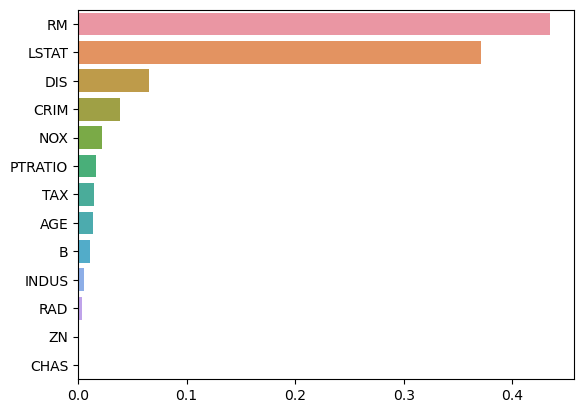

In [37]:
import seaborn as sns

rf_reg = RandomForestRegressor(n_estimators = 1000)

rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data = rf_reg.feature_importances_, index = X_data.columns)
feature_series = feature_series.sort_values(ascending = False)
sns.barplot(x = feature_series, y = feature_series.index)

(100, 2)


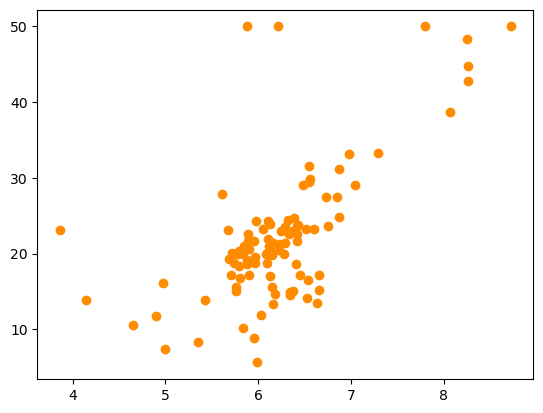

In [38]:
import matplotlib.pyplot as plt

bostonDF_sample = bostonDF[['RM', 'PRICE']]
bostonDF_sample = bostonDF_sample.sample(n=100, random_state = 0)
print(bostonDF_sample.shape)
plt.figure()
plt.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c = 'darkorange')

In [39]:
import numpy as np
from sklearn.linear_model import LinearRegression

lr_reg = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth = 2)
rf_reg7 = DecisionTreeRegressor(max_depth = 7)

X_test = np.arange(4.5, 8.5, 0.04).reshape(-1, 1)

X_feature= bostonDF_sample['RM'].values.reshape(-1, 1)
y_target = bostonDF_sample['PRICE'].values.reshape(-1, 1)

lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_reg2 = rf_reg2.predict(X_test)
pred_reg7 = rf_reg7.predict(X_test)

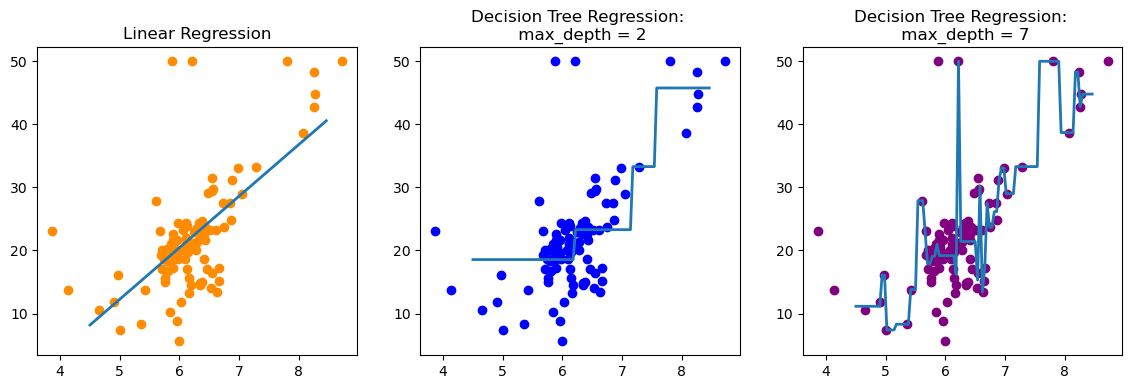

In [43]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize = (14,4), ncols = 3)

ax1.set_title('Linear Regression')
ax1.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c = 'darkorange')
ax1.plot(X_test, pred_lr, label = 'linear', linewidth = 2)

ax2.set_title('Decision Tree Regression: \n max_depth = 2')
ax2.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c = 'blue')
ax2.plot(X_test, pred_reg2, label = 'max_depth: 2', linewidth = 2)

ax3.set_title('Decision Tree Regression: \n max_depth = 7')
ax3.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c = 'purple')
ax3.plot(X_test, pred_reg7, label = 'max_depth: 7', linewidth = 2)

In [21]:
print((8.5-4.5)/0.04)

100.0


### 자전거 대여 수요 예측
* date : hourly date + timestamp
* season : 1 = 봄, 2 = 여름, 3 = 가을, 4 = 겨울
* holiday : 1 = 토, 일요일의 주말을 제외한 국경일 등의 휴일, 0 = 휴일이 아닌날
* workingday : 1 = 토, 일요일의 주말 및 휴일이 아닌 주중, 0 = 주말 및 휴일
* weather : 1=맑음, 약간 구름 낀 흐림, 2=안개, 안개 + 흐림, 3=가벼운 눈, 가벼운 비 + 천둥, 4=심한 눈/비, 천둥/번개
* temp:온도(섭씨)
* atemp:체감온도(섭씨)
* humidity:상대습도
* windspeed:풍속
* casual:사전에 등록되지 않는 사용자가 대여한 횟수
* registered:사전에 등록된 사용자가 대여한 횟수
* count:대여 횟수

1. csv 파일 읽어오기
2. info, desc
3. datetime 필드 -> 년, 월, 일, 시간
4. casual, registered 제거
5. x의 피처별 count의 관계를 막대그래프로 시각화
6. 데이터 분리
7. 모델 설정 : LinearRegression()
8. 훈련, predict,
9. metrics 보기(rmse, rmsle)
* 주요 importances 값 시각화(coef_)
-------------------------------------------------------------
10. feature들을 one-hot encoding
11. RandomForestRegressor, GradientBoostingRegressor,
XGBRegressor, LGBMRegressor 알고리즘 적용

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)

bike_df = pd.read_csv(r'./bike-sharing-demand/bike_train.csv')
print(bike_df.shape)
display(bike_df.info(), bike_df.describe(), bike_df.head())

(10886, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


None

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [44]:
!pwd

/mnt/FE0A5E240A5DDA6B/workspace/practice/ML


In [45]:
bike_test = pd.read_csv(r'./bike-sharing-demand/test.csv')
print(bike_test.shape)

(6493, 9)


In [3]:
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)
bike_df['year'] = bike_df.datetime.apply(lambda x: x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x: x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x: x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x: x.hour)
bike_df.tail(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,2012,12,19,23


In [4]:
drop_columns = ['datetime', 'casual', 'registered']
bike_df.drop(drop_columns, axis = 1, inplace = True)
bike_df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4


In [5]:
bike_df.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.163439,-0.004797,0.971524,0.001729,-0.006546
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,-0.005393,0.012021,0.001731,-0.015877,-0.000354
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,0.011594,-0.002482,-0.003394,0.009829,0.002780
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.128655,-0.012548,0.012144,-0.007890,-0.022740
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.394454,0.061226,0.257589,0.015551,0.145430
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.389784,0.058540,0.264173,0.011866,0.140343
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.317371,-0.078606,0.204537,-0.011335,-0.278011
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.101369,-0.015221,-0.150192,0.036157,0.146631
count,0.163439,-0.005393,0.011594,-0.128655,0.394454,0.389784,-0.317371,0.101369,1.000000,0.260403,0.166862,0.019826,0.400601
year,-0.004797,0.012021,-0.002482,-0.012548,0.061226,0.058540,-0.078606,-0.015221,0.260403,1.000000,-0.004932,0.001800,-0.004234


In [6]:
bike_df.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'count', 'year', 'month', 'day', 'hour'],
      dtype='object')

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

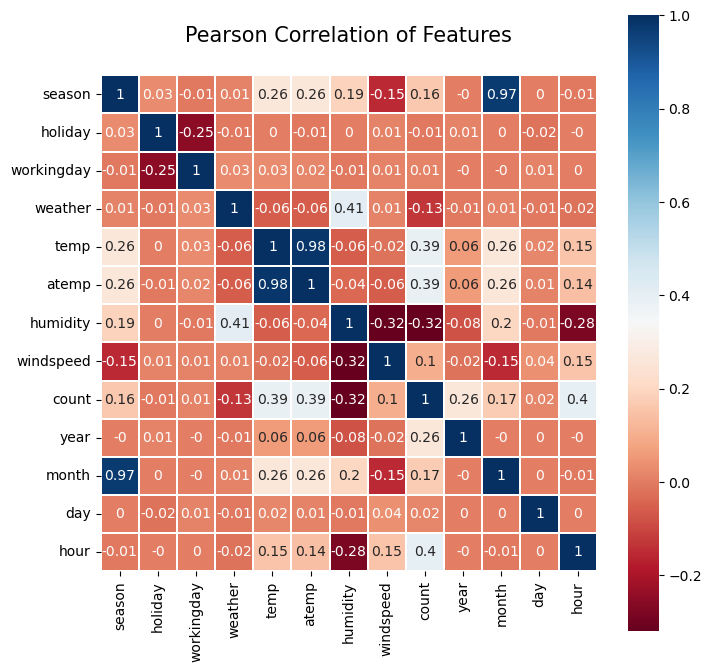

In [7]:
heatmap_data = bike_df[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'count', 'year', 'month', 'day', 'hour']]

colormap = plt.cm.RdBu
plt.figure(figsize=(8, 8))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(round(heatmap_data.astype(float).corr(), 2), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 10})

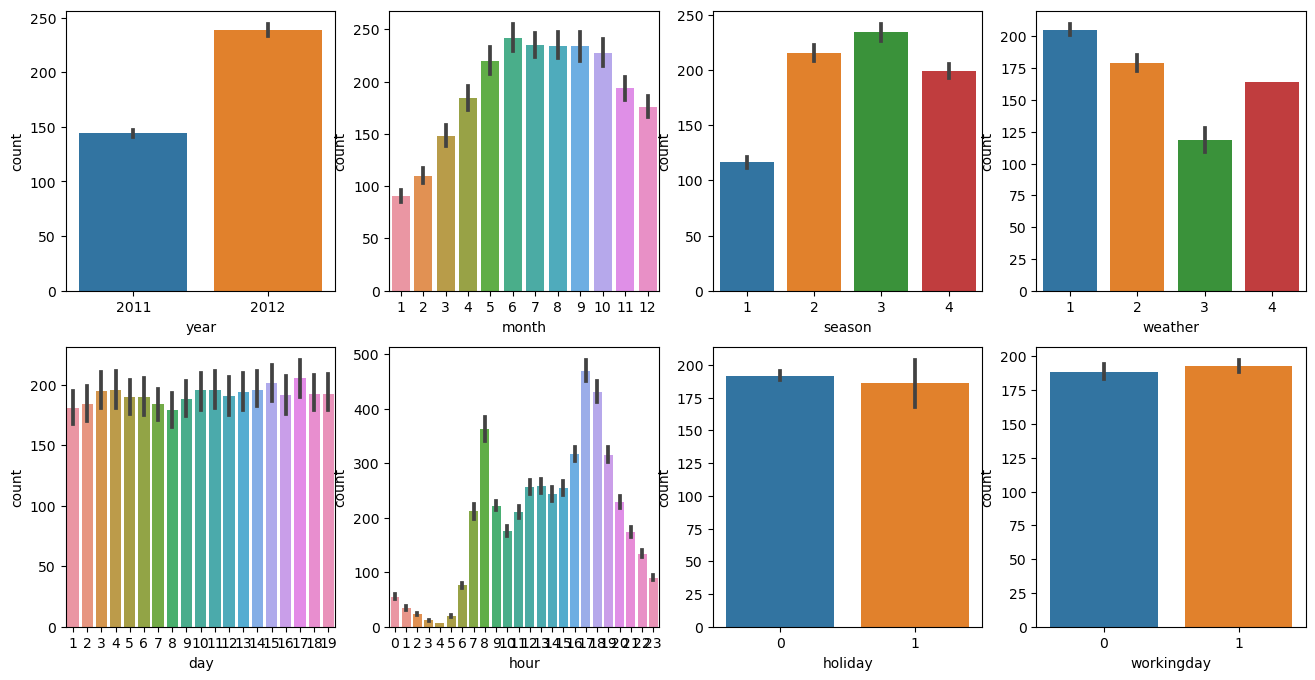

In [8]:
fig, axs = plt.subplots(figsize=(16,8), ncols = 4, nrows = 2)
cat_features = ['year', 'month', 'season', 'weather', 'day', 'hour', 'holiday', 'workingday']

for i, feature in enumerate(cat_features):
    row = int(i/4)
    col = i%4
    sns.barplot(x = feature, y = 'count', data = bike_df, ax = axs[row][col])


In [50]:
print(1e-1000 == 0.0)
print(np.log(1e-1000))
print(np.log(1e-1000 + 1)) # log1p: 로그에 + 1을 더해서 무한대로 튀는 것을 방지
print(np.log1p(1e-1000))

var_1 = np.log1p(100)
var_2 = np.expm1(var_1) # 원래 값으로 변환
print(var_1, var_2)

0.0
True
-inf
0.0
0.0
4.61512051684126 100.00000000000003


In [48]:
print(10 ** 4.615)

41209.751909733044


In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

def rmse(y, pred):
    return np.sqrt(mean_squared_error(y, pred))

def evaluate_regr(y, pred):
    rmsle_val = rmsle(y, pred)
    rmse_val = rmse(y, pred)
    mae_val = mean_absolute_error(y, pred)
    print(f'RMSLE: {rmsle_val:.3f}, RMSE: {rmse_val:.3F}, MAE: {mae_val:.3F}')

In [10]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

y_target = bike_df['count']
X_features = bike_df.drop(['count'], axis = 1, inplace = False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.3, random_state=0)


### OLS : Ordinary Least Squares 보통최소제곱

** OLS란 어떤 계의 해방정식을 근사적으로 구하는 방법으로서 근사적으로 구하려는 해와 실제 해의 오차의 제곱의 합이 최소가 되는 해를 구하는 방법이다. [출처: 위키백과]

MSE(평균제곱오차)를 이용하는 loss function과 비슷한 개념인 듯!

ols('종속변수명 ~ 독립변수명', data=데이터프레임명).fit().summary()

    Dep. Variable: Dependent variable, 종속변수

    Model: 모델링 방법, OLS는 Ordinary Least Squares의 약자

    No. Observations: Number of observations, 관찰표본 수, 즉 총 표본 수

    Df Residuals: DF는 Degree of Freedom으로 자유도를 뜻하는데, DF Residuals는 전체 표본 수에서 측정되는 변수들(종속변수 및 독립변수)의 개수를 빼서 구함. 이번 회귀분석에서 DF Residuals를 구하자면, 전체 표본 수 50개 - 종속변수1개 - 독립변수1개 = 48로 구할 수 있음

    Df Model: 독립변수의 개수

    R squared: R의 제곱이라는 뜻이고 결정계수를 의미. 전체 데이터 중 해당 회귀모델이 설명할 수 있는 데이터의 비율, 회귀식의 설명력을 나타냄. SSTr/SST이나 상관계수 R을 제곱해서 구할 수 있음

    F-statistics: F통계량. F통계량은 MSR/MSE로 구할 수 있음

    Prob: F통계량에 해당하는 P-value. P는 Probability의 첫글자

    Intercept coef: Intercept coefficient는 회귀식의 절편 값

    speed coef: 독립변수 coefficient는 독립변수 "speed"의 회귀계수를 의미하며, 회귀식에서 기울기

    P>|t| : p-value가 0.05보다 작으면 해당 변수는 유의함

In [11]:
import statsmodels.api as sm

X_train2 = sm.add_constant(X_train)
model2 = sm.OLS(y_train, X_train2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     403.7
Date:                Tue, 18 Oct 2022   Prob (F-statistic):               0.00
Time:                        10:11:08   Log-Likelihood:                -48569.
No. Observations:                7620   AIC:                         9.716e+04
Df Residuals:                    7607   BIC:                         9.725e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.641e+05   6585.954    -24.909      0.000   -1.77e+05   -1.51e+05
season        -7.9978      6.219     -1.286      0.198     -20.188       4.193
holiday       -5.9066     10.080     -0.586      0.558     -25.667      13.854
workingday     3.0994      3.616      0.857      0.391      -3.989      10.188
weather       -5.5402      2.891     -1.916      0.055     -11.207       0.127
temp           2.5799      1.215      2.124      0.034       0.198       4.961
atemp          3.8271      1.117      3.426      0.001       1.637       6.017
humidity      -2.0563      0.105    -19.520      0.000      -2.263      -1.850
windspeed      0.3283      0.217      1.510      0.131      -0.098       0.755
year          81.5746      3.274     24.917      0.000      75.157      87.992
month         10.2339      2.017      5.074      0.000       6.280      14.188
day            0.4738      0.296      1.600      0.110      -0.107       1.054
hour           7.9042      0.249     31.804      0.000       7.417       8.391
==============================================================================
Omnibus:                     1482.293   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2841.051
Skew:                           1.191   Prob(JB):                         0.00
Kurtosis:                       4.811   Cond. No.                     8.15e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.15e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### P>|t| < 0.05인 columns: temp, atemp, humidity, year, month, hour

In [12]:
lr_reg = LinearRegression()
dt_reg = DecisionTreeRegressor(random_state = 0, max_depth = 4)
rf_reg = RandomForestRegressor(random_state = 0, n_estimators = 1000)
gd_reg = GradientBoostingRegressor(random_state = 0, n_estimators = 1000)
xgb_reg = XGBRegressor(n_estimators = 1000)
lgb_reg = LGBMRegressor(n_estimators = 1000)

In [13]:
y_test.nlargest(10)

9608    901
9632    900
8984    897
8625    891
9944    890
9512    886
9921    884
7616    873
7856    869
8024    867
Name: count, dtype: int64

In [14]:
bike_df.index

RangeIndex(start=0, stop=10886, step=1)

In [15]:
bike_df['count']

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64

In [16]:
def get_top_error_data(y_test, pred, n_tops = 5):
    result_df = pd.DataFrame(y_test.values, columns = ['real_count'])
    result_df['predicted_count'] = np.round(pred)
    result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])

    print(result_df.sort_values('diff', ascending = False)[:n_tops])

In [17]:
models = [lr_reg, dt_reg, rf_reg, gd_reg, xgb_reg, lgb_reg]

for model in models:
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(f'{model}: {evaluate_regr(y_test, pred)}')
    get_top_error_data(y_test, pred, n_tops = 5)
    print()

RMSLE: 1.165, RMSE: 140.900, MAE: 105.924
LinearRegression(): None
      real_count  predicted_count   diff
1618         890            322.0  568.0
3151         798            241.0  557.0
966          884            327.0  557.0
412          745            194.0  551.0
2817         856            310.0  546.0

RMSLE: 0.711, RMSE: 117.543, MAE: 80.714
DecisionTreeRegressor(max_depth=4, random_state=0): None
      real_count  predicted_count   diff
3151         798            269.0  529.0
1029         901            415.0  486.0
637          900            415.0  485.0
751          897            415.0  482.0
1181         891            415.0  476.0

RMSLE: 0.353, RMSE: 45.330, MAE: 28.476
RandomForestRegressor(n_estimators=1000, random_state=0): None
      real_count  predicted_count   diff
1978         134            616.0  482.0
2842         119            516.0  397.0
1622         370            718.0  348.0
215          156            488.0  332.0
1095         743            414.0

### get_top_error_data 함수로 예측 오류가 꽤 큰 것을 확인할 수 있다.
- Target 값의 분포가 정규 분포가 아닌 왜곡된 형태인지 확인해보자.

<AxesSubplot:>

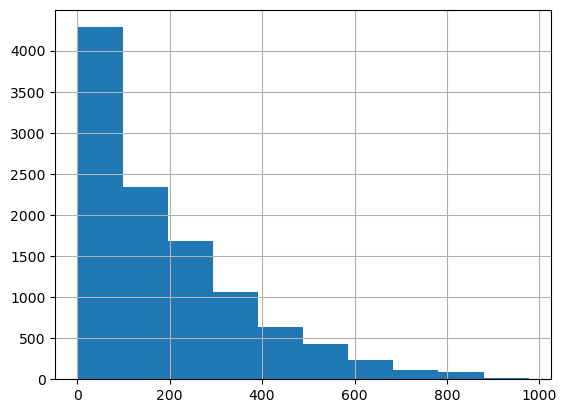

In [18]:
y_target.hist()

<AxesSubplot:>

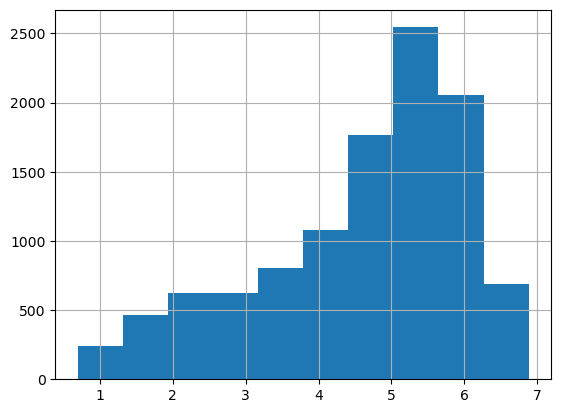

In [19]:
y_log_transform = np.log1p(y_target)
y_log_transform.hist()

#### 가장 낮은 RMSLE(0.353)은 RandomForestRegressor

#### accuracy의 경우 분류에 사용되는 성능지표로, 회귀 트리 Regressor에 사용할 수 없음 -> R2?
- "ValueError: Classification metrics can't handle a mix of multiclass and continuous targets"
- from sklearn.metrics import accuracy_score
- accuracy_score(y_test, pred)

In [20]:
X_features.head(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,2


In [21]:
print(len(X_features.columns))
X_features.columns

12


Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'year', 'month', 'day', 'hour'],
      dtype='object')

### LinearRegression 객체의 coef_ 속성으로 피처별 회귀 계수 값 확인

year          81.6
month         10.2
hour           7.9
atemp          3.8
workingday     3.1
temp           2.6
day            0.5
windspeed      0.3
humidity      -2.1
weather       -5.5
holiday       -5.9
season        -8.0
dtype: float64


<AxesSubplot:>

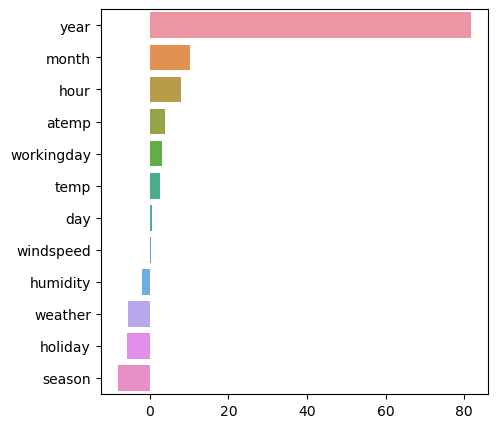

In [22]:
plt.figure(figsize = (5, 5))
coeff = pd.Series(data = np.round(lr_reg.coef_, 1), index = X_features.columns)
coeff = coeff.sort_values(ascending = False)
print(coeff)
sns.barplot(x = coeff.values, y = coeff.index)

### 회귀 트리 Regressor 클래스의 feature_importances_ 속성으로 피처별 중요도 확인

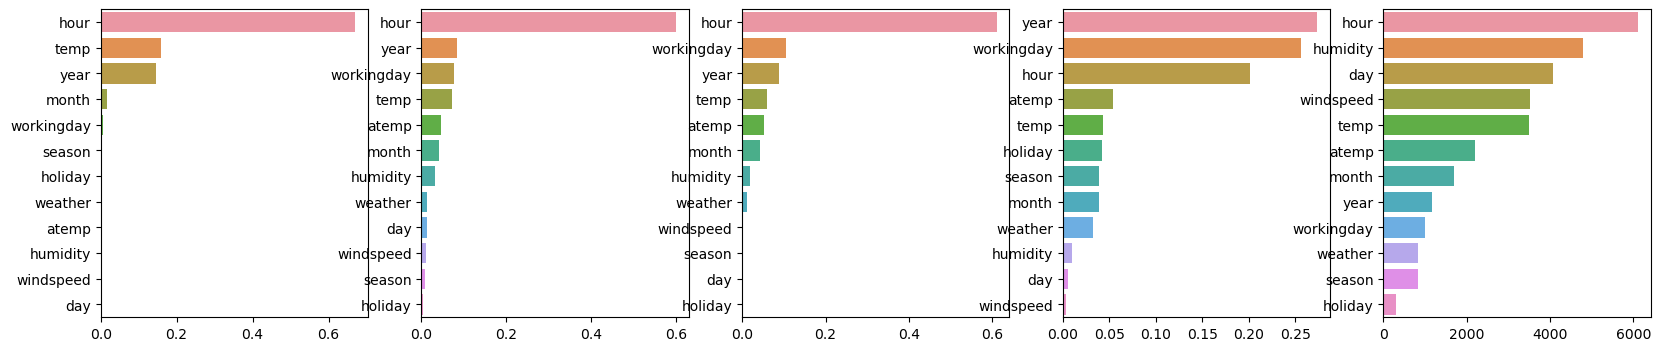

In [23]:
fig, axs = plt.subplots(figsize = (20, 4), ncols = 5)
algorithms = [dt_reg, rf_reg, gd_reg, xgb_reg, lgb_reg]

for i, model in enumerate(algorithms):
    feature_series = pd.Series(data = model.feature_importances_, index = X_features.columns)
    feature_series = feature_series.sort_values(ascending = False)
    sns.barplot(x = feature_series, y = feature_series.index, ax = axs[i])

### 로그로 Target 값을 변환한 후에 다시 학습 후 평가 수행

In [24]:
y_target_log = np.log1p(y_target)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target_log, test_size = 0.3, random_state=0)

# models = [lr_reg, dt_reg, rf_reg, gd_reg, xgb_reg, lgb_reg]
models = [lr_reg]

for model in models:
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    y_test_exp = np.expm1(y_test) # 테스트 데이터 세트의 Target 값은 로그 변환됐으므로 다시 expm1을 이용해 원래 스케일로 변환
    pred_exp = np.expm1(pred) # 예측값 역시 로그 변환된 타깃 기반으로 학습돼 예측됐으므로 다시 expm1로 스케일 변환
    print(f'{model}: {evaluate_regr(y_test_exp, pred_exp)}')
    get_top_error_data(y_test, pred, n_tops = 5)
    print()

RMSLE: 1.017, RMSE: 162.594, MAE: 109.286
LinearRegression(): None
      real_count  predicted_count      diff
1521    0.693147              4.0  3.306853
786     0.693147              4.0  3.306853
1242    0.693147              4.0  3.306853
3168    0.693147              4.0  3.306853
3238    0.693147              4.0  3.306853



### RMSLE는 줄어들었지만, RMSE는 오히려 늘어남. 카테고리형 피처들을 피처 인코딩(OneHotEncoding) 해주자.

In [25]:
X_features_ohe = pd.get_dummies(X_features, columns = ['year', 'month', 'day', 'hour', 'holiday', 'workingday', 'season', 'weather'])

In [26]:
X_features_ohe.head()

,temp,atemp,humidity,windspeed,year_2011,year_2012,month_1,month_2,month_3,month_4,...,workingday_0,workingday_1,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,9.84,14.395,81,0.0,1,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0
1,9.02,13.635,80,0.0,1,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0
2,9.02,13.635,80,0.0,1,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0
3,9.84,14.395,75,0.0,1,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0
4,9.84,14.395,75,0.0,1,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_target_log, test_size = 0.3, random_state=0)

def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1 = False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1:
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###', model.__class__.__name__, '###')
    evaluate_regr(y_test, pred)

lr_reg = LinearRegression()
ridge_reg = Ridge(alpha = 10)
lasso_reg = Lasso(alpha = 0.01)
dt_reg = DecisionTreeRegressor(random_state = 0, max_depth = 4)
rf_reg = RandomForestRegressor(random_state = 0, n_estimators = 1000)
gd_reg = GradientBoostingRegressor(random_state = 0, n_estimators = 1000)
xgb_reg = XGBRegressor(n_estimators = 1000)
lgb_reg = LGBMRegressor(n_estimators = 1000)

# models = [lr_reg, ridge_reg, lasso_reg, dt_reg, rf_reg, gd_reg, xgb_reg, lgb_reg]
models = [lr_reg, ridge_reg, lasso_reg]

for model in models:
    get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1 = True)

RMSLE: 0.590, RMSE: 97.687, MAE: 63.382
LinearRegression(): None
      real_count  predicted_count      diff
972     1.098612              4.0  2.901388
1139    1.386294              4.0  2.613706
1223    1.386294              4.0  2.613706
759     2.484907              5.0  2.515093
149     2.484907              5.0  2.515093

### LinearRegression ###
RMSLE: 0.590, RMSE: 97.687, MAE: 63.382
### Ridge ###
RMSLE: 0.590, RMSE: 98.529, MAE: 63.893
### Lasso ###
RMSLE: 0.635, RMSE: 113.219, MAE: 72.803


month_9         1.005357e+10
month_8         1.005357e+10
month_7         1.005357e+10
month_3         7.513565e+09
month_2         7.513565e+09
month_1         7.513565e+09
month_5         6.454883e+09
month_6         6.454883e+09
month_4         6.454883e+09
season_4        4.714190e+09
holiday_0       8.388193e+08
holiday_1       8.388193e+08
atemp           1.465651e-02
temp            8.480947e-03
humidity       -3.365439e-03
windspeed      -3.725790e-03
workingday_0   -1.969882e+06
workingday_1   -1.969882e+06
month_10       -1.422514e+08
month_11       -1.422514e+08
dtype: float64


<AxesSubplot:>

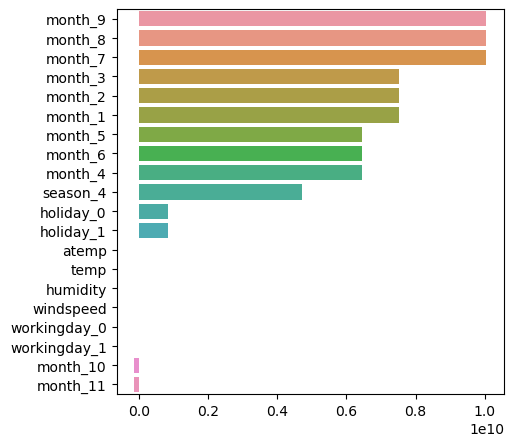

In [29]:
plt.figure(figsize = (5, 5))
coeff = pd.Series(lr_reg.coef_, index = X_features_ohe.columns)
coeff = coeff.sort_values(ascending = False)[:20]
print(coeff)
sns.barplot(x = coeff.values, y = coeff.index)

In [30]:
rf_reg = RandomForestRegressor(n_estimators = 500)
gbm_reg = GradientBoostingRegressor(n_estimators = 500)
xgb_reg = XGBRegressor(n_estimators = 500)
lgbm_reg = LGBMRegressor(n_estimators = 500)

for model in [rf_reg, gbm_reg, xgb_reg, lgbm_reg]:
    get_model_predict(model, X_train.values, X_test.values, y_train.values, y_test.values, is_expm1 = True)

### RandomForestRegressor ###
RMSLE: 0.354, RMSE: 50.167, MAE: 31.042
### GradientBoostingRegressor ###
RMSLE: 0.330, RMSE: 53.321, MAE: 32.735
### XGBRegressor ###
RMSLE: 0.342, RMSE: 51.732, MAE: 31.251
### LGBMRegressor ###
RMSLE: 0.319, RMSE: 47.215, MAE: 29.029
